<a href="https://colab.research.google.com/github/PRETTYMARTHA/Prediction-of-product-sales/blob/main/Project_4_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Martha Nairuba**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set display to 100 maximum columns
pd.set_option('display.max_columns',100)
import missingno as msno
from sklearn.model_selection import train_test_split#, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio
from google.colab import drive

In [2]:
#Importing my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading my data
df = pd.read_csv("/content/drive/MyDrive/adult.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Define X and y
target = "income"
X = df.drop(columns=target)
y = df[target]

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


We don't have any missing values

In [6]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

  income  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0  <=50K        False                  False                False   
1  <=50K        False                  False                False   
2   >50K        False                  False                 True   
3   >50K        False                  False                False   
4  <=50K         True                  False                False   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                   False             

In [7]:
#Scaling my data
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Rename columns to remove leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
num_transformer = make_pipeline.steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]

# Preprocessing for categorical data
cat_transformer = make_pipeline.steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



**What does one row represent?**

Each row shows a snapshot of the demographic and social economic characteristic of an individual

In [8]:
# Get the number of features
num_features = df.shape[1]

print(f"The dataset has {num_features} features.")


The dataset has 15 features.


In [9]:
# Get the number of rows and features
num_rows = df.shape[0]
num_features = df.shape[1]

print(f"The dataset has {num_rows} rows and {num_features} features.")


The dataset has 45222 rows and 15 features.


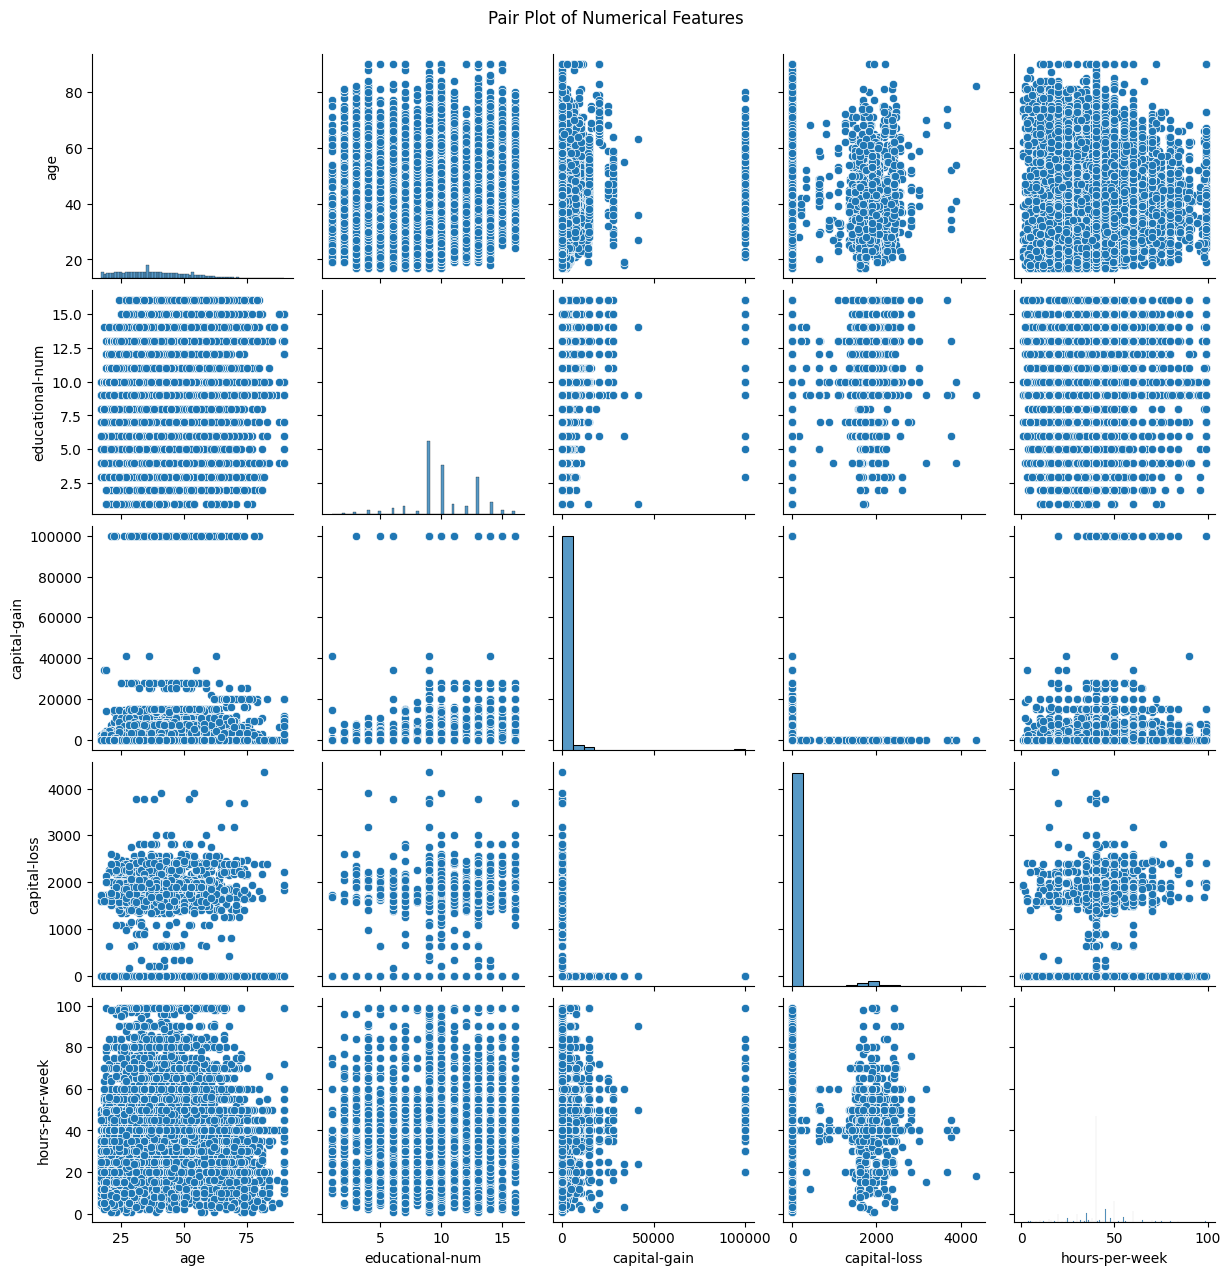

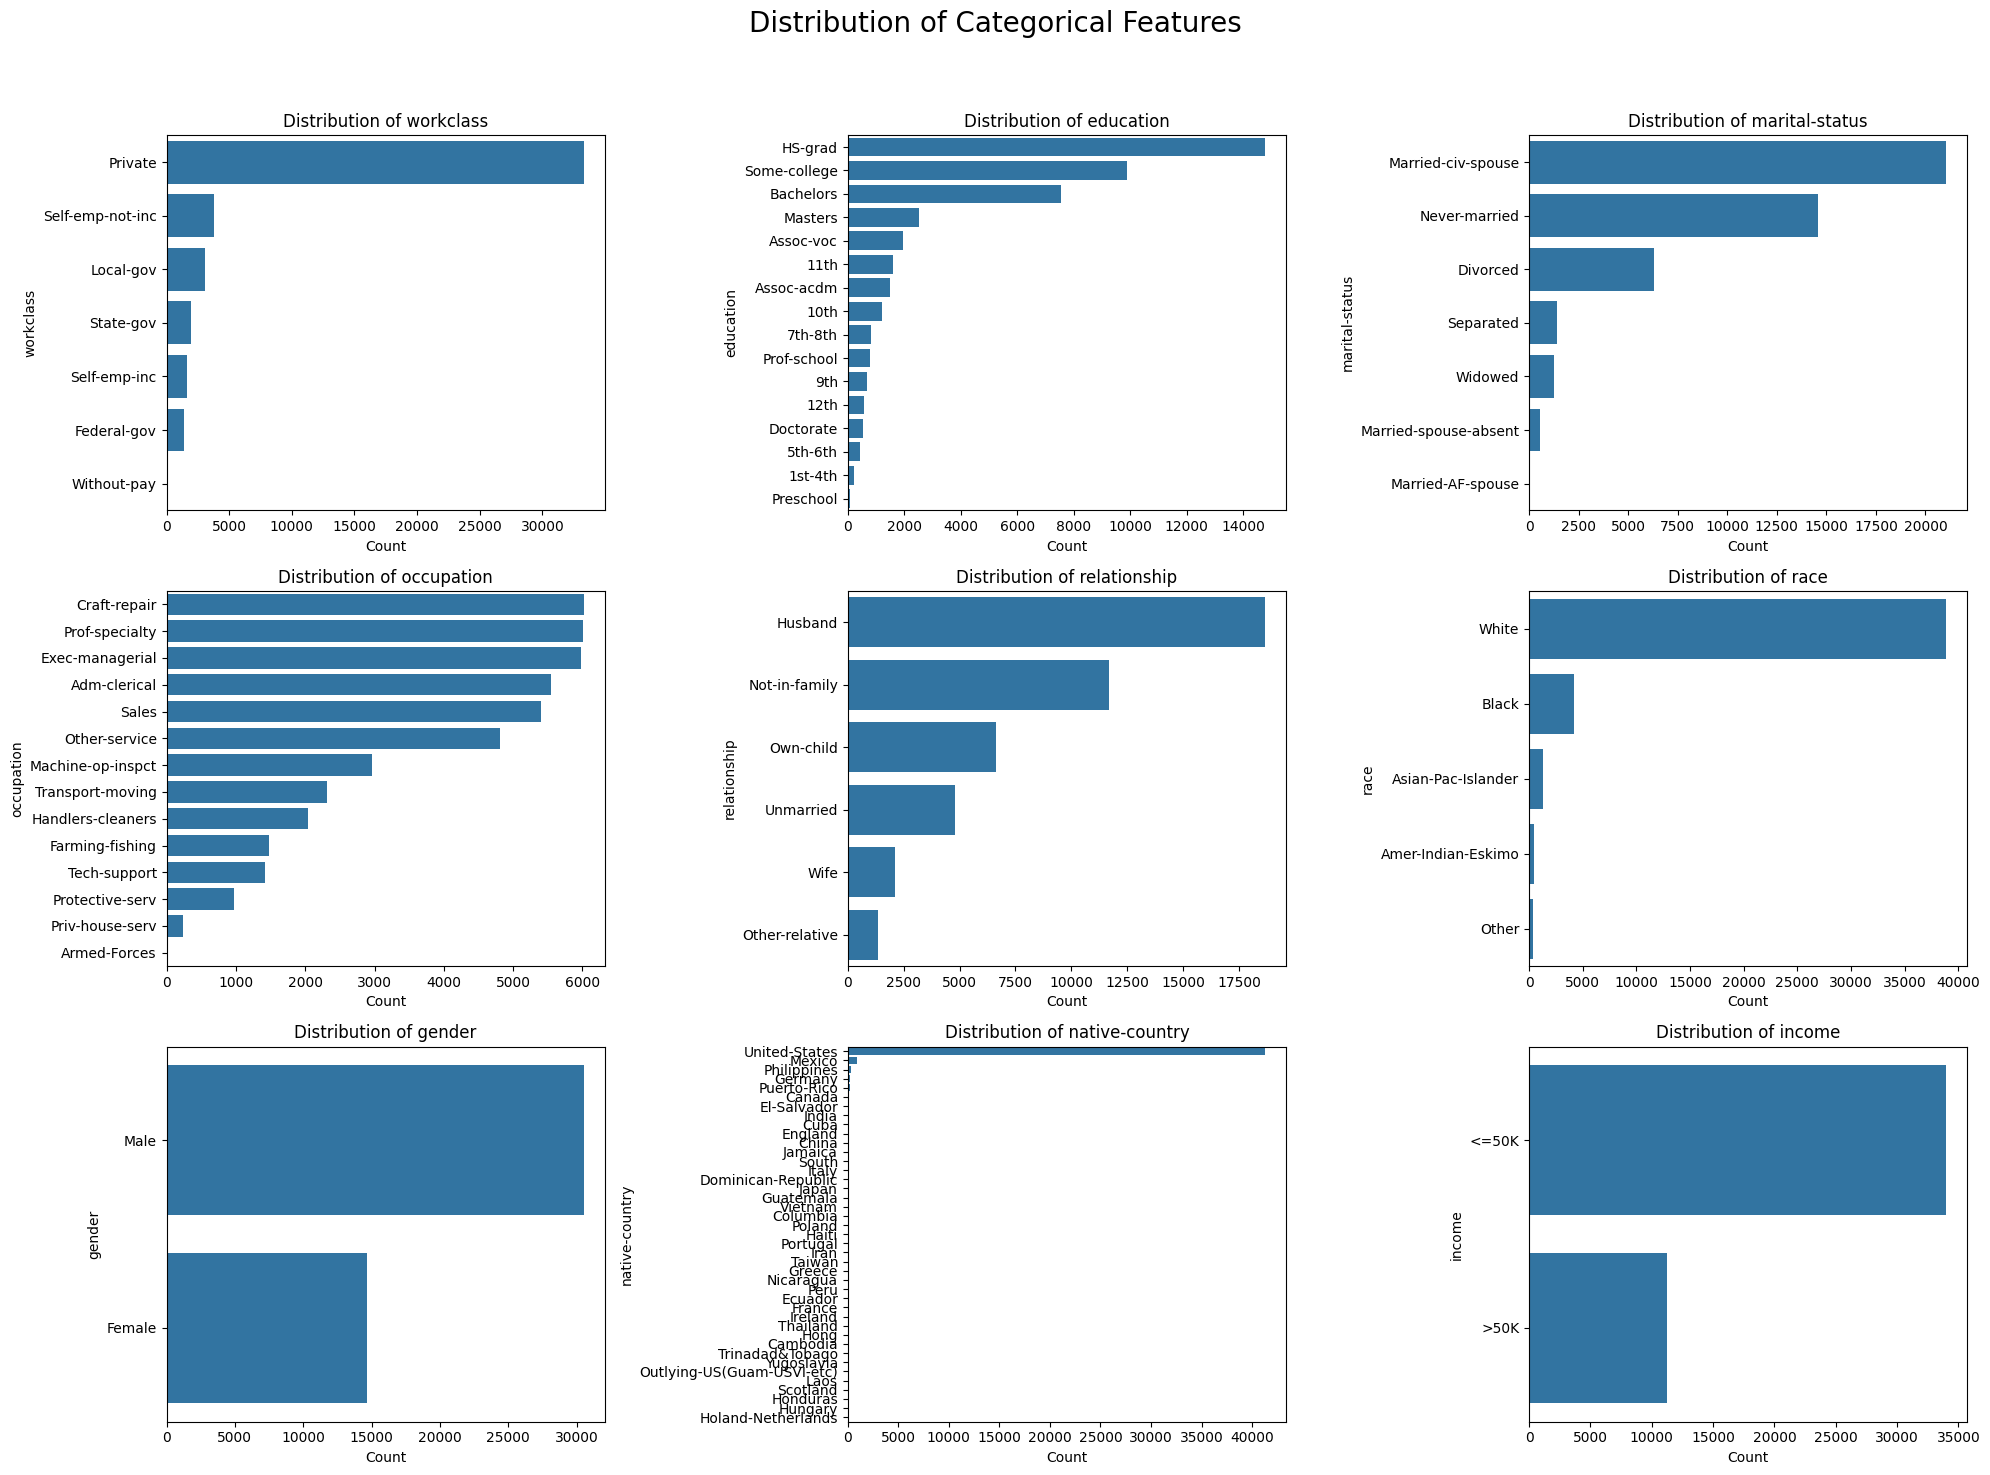

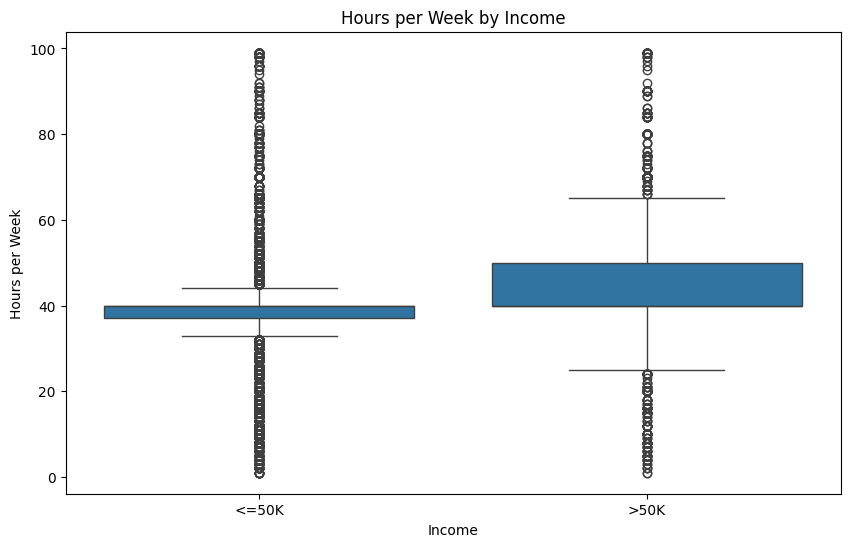

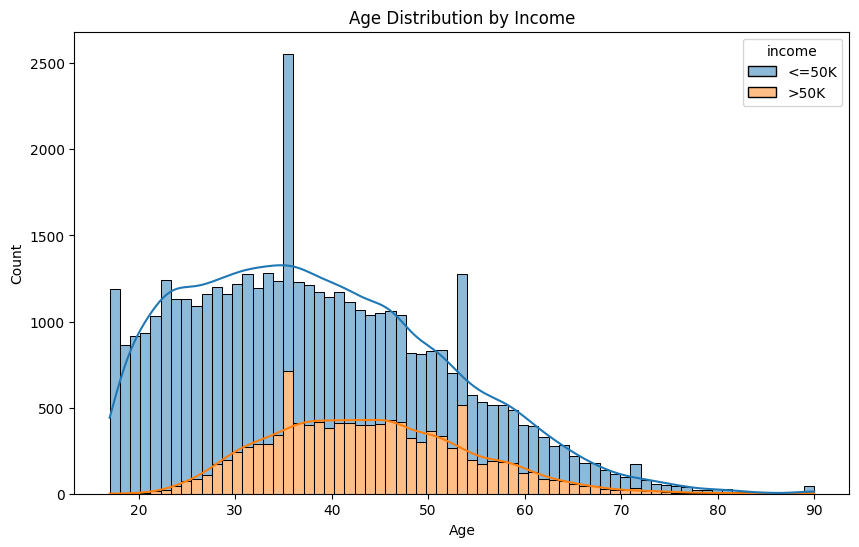

In [10]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)
# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Rename columns to remove leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Pair plot for numerical features
num_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Distribution of categorical features
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Hours per week by income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

# Age distribution by income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', multiple='stack', kde=True)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


According to the visualization above we that the more hours worked per week, the higher the income earned.

We also see in the other graph that a person who is 35 years earns the highest income then the person who is 54 years earns the second highest income while those from 79 and above earn the lowest income but on 90 years the income increases alittle bit.


In [11]:
#Preprocessing my data
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Rename columns to remove leading/trailing spaces
df.columns = [col.strip() for col in df.columns]

# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
num_transformer = make_pipeline.steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]

# Preprocessing for categorical data
cat_transformer = make_pipeline.steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)




In [15]:
# List of columns to convert (example based on typical adult dataset structure)
columns_to_convert = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Convert the columns from string to float
for col in columns_to_convert:
    df[col] = df[col].astype(float)

# Verify the conversion
print(df.dtypes)


age                float64
workclass           object
fnlwgt             float64
education           object
educational-num    float64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object


In [21]:
#Fit and evaluate a default model
# Display the first few rows and data types of the dataset
print(df.head())
print(df.dtypes)

# Convert the identified columns from string to float
columns_to_convert = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in columns_to_convert:
    df[col] = df[col].astype(float)

# Verify the conversion
print(df.dtypes)

# Handle missing values if any
df = df.dropna()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Verify preprocessing
print(df.head())

# Separate features and target variable
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


    age  workclass    fnlwgt     education  educational-num  \
0  25.0    Private  226802.0          11th              7.0   
1  38.0    Private   89814.0       HS-grad              9.0   
2  28.0  Local-gov  336951.0    Assoc-acdm             12.0   
3  44.0    Private  160323.0  Some-college             10.0   
5  34.0    Private  198693.0          10th              6.0   

       marital-status         occupation   relationship   race gender  \
0       Never-married  Machine-op-inspct      Own-child  Black   Male   
1  Married-civ-spouse    Farming-fishing        Husband  White   Male   
2  Married-civ-spouse    Protective-serv        Husband  White   Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black   Male   
5       Never-married      Other-service  Not-in-family  White   Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0            40.0  United-States  <=50K  
1           0.0           0.0            5

Accuracy: 0.7954671088999448
                                   Importance
capital-gain                         0.066755
capital-loss                         0.021879
fnlwgt                               0.001504
native-country_Ecuador               0.000000
native-country_Honduras              0.000000
native-country_Holand-Netherlands    0.000000
native-country_Haiti                 0.000000
native-country_Guatemala             0.000000
native-country_Greece                0.000000
native-country_Germany               0.000000


<Figure size 1000x600 with 0 Axes>

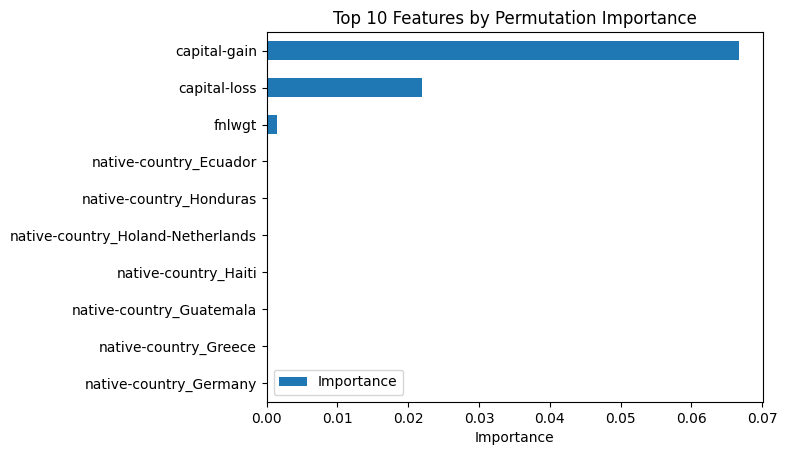

In [22]:
#Extract and visualize the top 10 features using permutation importance
from sklearn.inspection import permutation_importance

# Encode categorical variables
data = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature names
feature_names = X.columns

# Create a DataFrame for the results
perm_importance_df = pd.DataFrame(result.importances_mean, index=feature_names, columns=["Importance"])

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 10 features
top_10_features = perm_importance_df.head(10)
print(top_10_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


According to the above visualization we see that capital gain holds higher permutation importance among the top 10.

Based on the business case these features make sense because every business targets caital gains which holds the highest permutation importance.

Accuracy: 0.7954671088999448
                                   Importance
capital-gain                         0.066755
capital-loss                         0.021879
fnlwgt                               0.001504
native-country_Ecuador               0.000000
native-country_Honduras              0.000000
native-country_Holand-Netherlands    0.000000
native-country_Haiti                 0.000000
native-country_Guatemala             0.000000
native-country_Greece                0.000000
native-country_Germany               0.000000


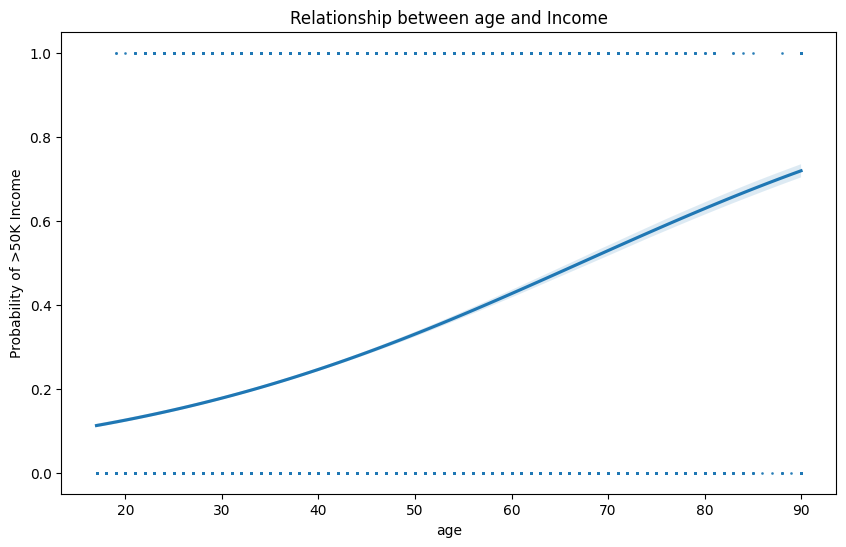

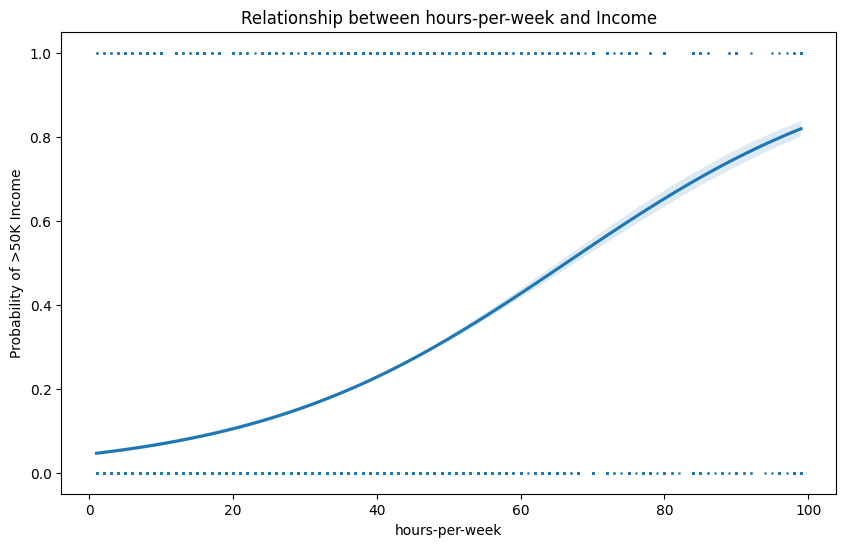

In [24]:
#Visualization for the most important features

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature names
feature_names = X.columns

# Create a DataFrame for the results
perm_importance_df = pd.DataFrame(result.importances_mean, index=feature_names, columns=["Importance"])

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 10 features
top_10_features = perm_importance_df.head(10)
print(top_10_features)

# Select the two features
feature1 = 'age'
feature2 = 'hours-per-week'

# Scatter plot with regression line for 'age' vs. 'income'
plt.figure(figsize=(10, 6))
sns.regplot(x=feature1, y=y, data=data, logistic=True, scatter_kws={'s': 1})
plt.title(f'Relationship between {feature1} and Income')
plt.xlabel(feature1)
plt.ylabel('Probability of >50K Income')
plt.show()

# Scatter plot with regression line for 'hours-per-week' vs. 'income'
plt.figure(figsize=(10, 6))
sns.regplot(x=feature2, y=y, data=data, logistic=True, scatter_kws={'s': 1})
plt.title(f'Relationship between {feature2} and Income')
plt.xlabel(feature2)
plt.ylabel('Probability of >50K Income')
plt.show()


According to our plots above, the first plot shows us that the higher the age the higher the risk of earning below 50k income and the lower the age the lower the risk of earning below 50k income.

While the second plot shows us that the more hours worked per week the higher the risk of earning below 50k income while the less hours worked per week the less risk of earning below 50k income